https://www.kaggle.com/datasets/lakshmi25npathi/gold-price

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BSE-BOM590111.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,2017-02-06,0.79,0.79,0.76,0.76,0.79,7430.0,7.0,5848.0,7430.0,100.0,0.03,-0.03
1,2017-02-03,0.79,0.79,0.79,0.79,0.79,310.0,4.0,244.0,310.0,100.0,0.00,0.00
2,2017-02-02,0.83,0.83,0.83,0.83,0.83,75.0,1.0,62.0,75.0,100.0,0.00,0.00
3,2017-01-31,0.87,0.87,0.87,0.87,0.87,1050.0,2.0,913.0,1050.0,100.0,0.00,0.00
4,2017-01-25,0.91,0.91,0.91,0.91,0.91,400.0,1.0,364.0,400.0,100.0,0.00,0.00


## EDA

In [13]:
for i in df.columns:
    print(i," feature has datatype ",df[i].dtype)

Open  feature has datatype  float64
High  feature has datatype  float64
Low  feature has datatype  float64
Close  feature has datatype  float64
WAP  feature has datatype  float64
No. of Shares  feature has datatype  float64
No. of Trades  feature has datatype  float64
Total Turnover  feature has datatype  float64
Deliverable Quantity  feature has datatype  float64
% Deli. Qty to Traded Qty  feature has datatype  float64
Spread H-L  feature has datatype  float64
Spread C-O  feature has datatype  float64


In [17]:
df.isnull().sum()

Open                         0
High                         0
Low                          0
Close                        0
WAP                          0
No. of Shares                0
No. of Trades                0
Total Turnover               0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread H-L                   0
Spread C-O                   0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       1660 non-null   float64
 1   High                       1660 non-null   float64
 2   Low                        1660 non-null   float64
 3   Close                      1660 non-null   float64
 4   WAP                        1660 non-null   float64
 5   No. of Shares              1660 non-null   float64
 6   No. of Trades              1660 non-null   float64
 7   Total Turnover             1660 non-null   float64
 8   Deliverable Quantity       1660 non-null   float64
 9   % Deli. Qty to Traded Qty  1660 non-null   float64
 10  Spread H-L                 1660 non-null   float64
 11  Spread C-O                 1660 non-null   float64
dtypes: float64(12)
memory usage: 155.8 KB


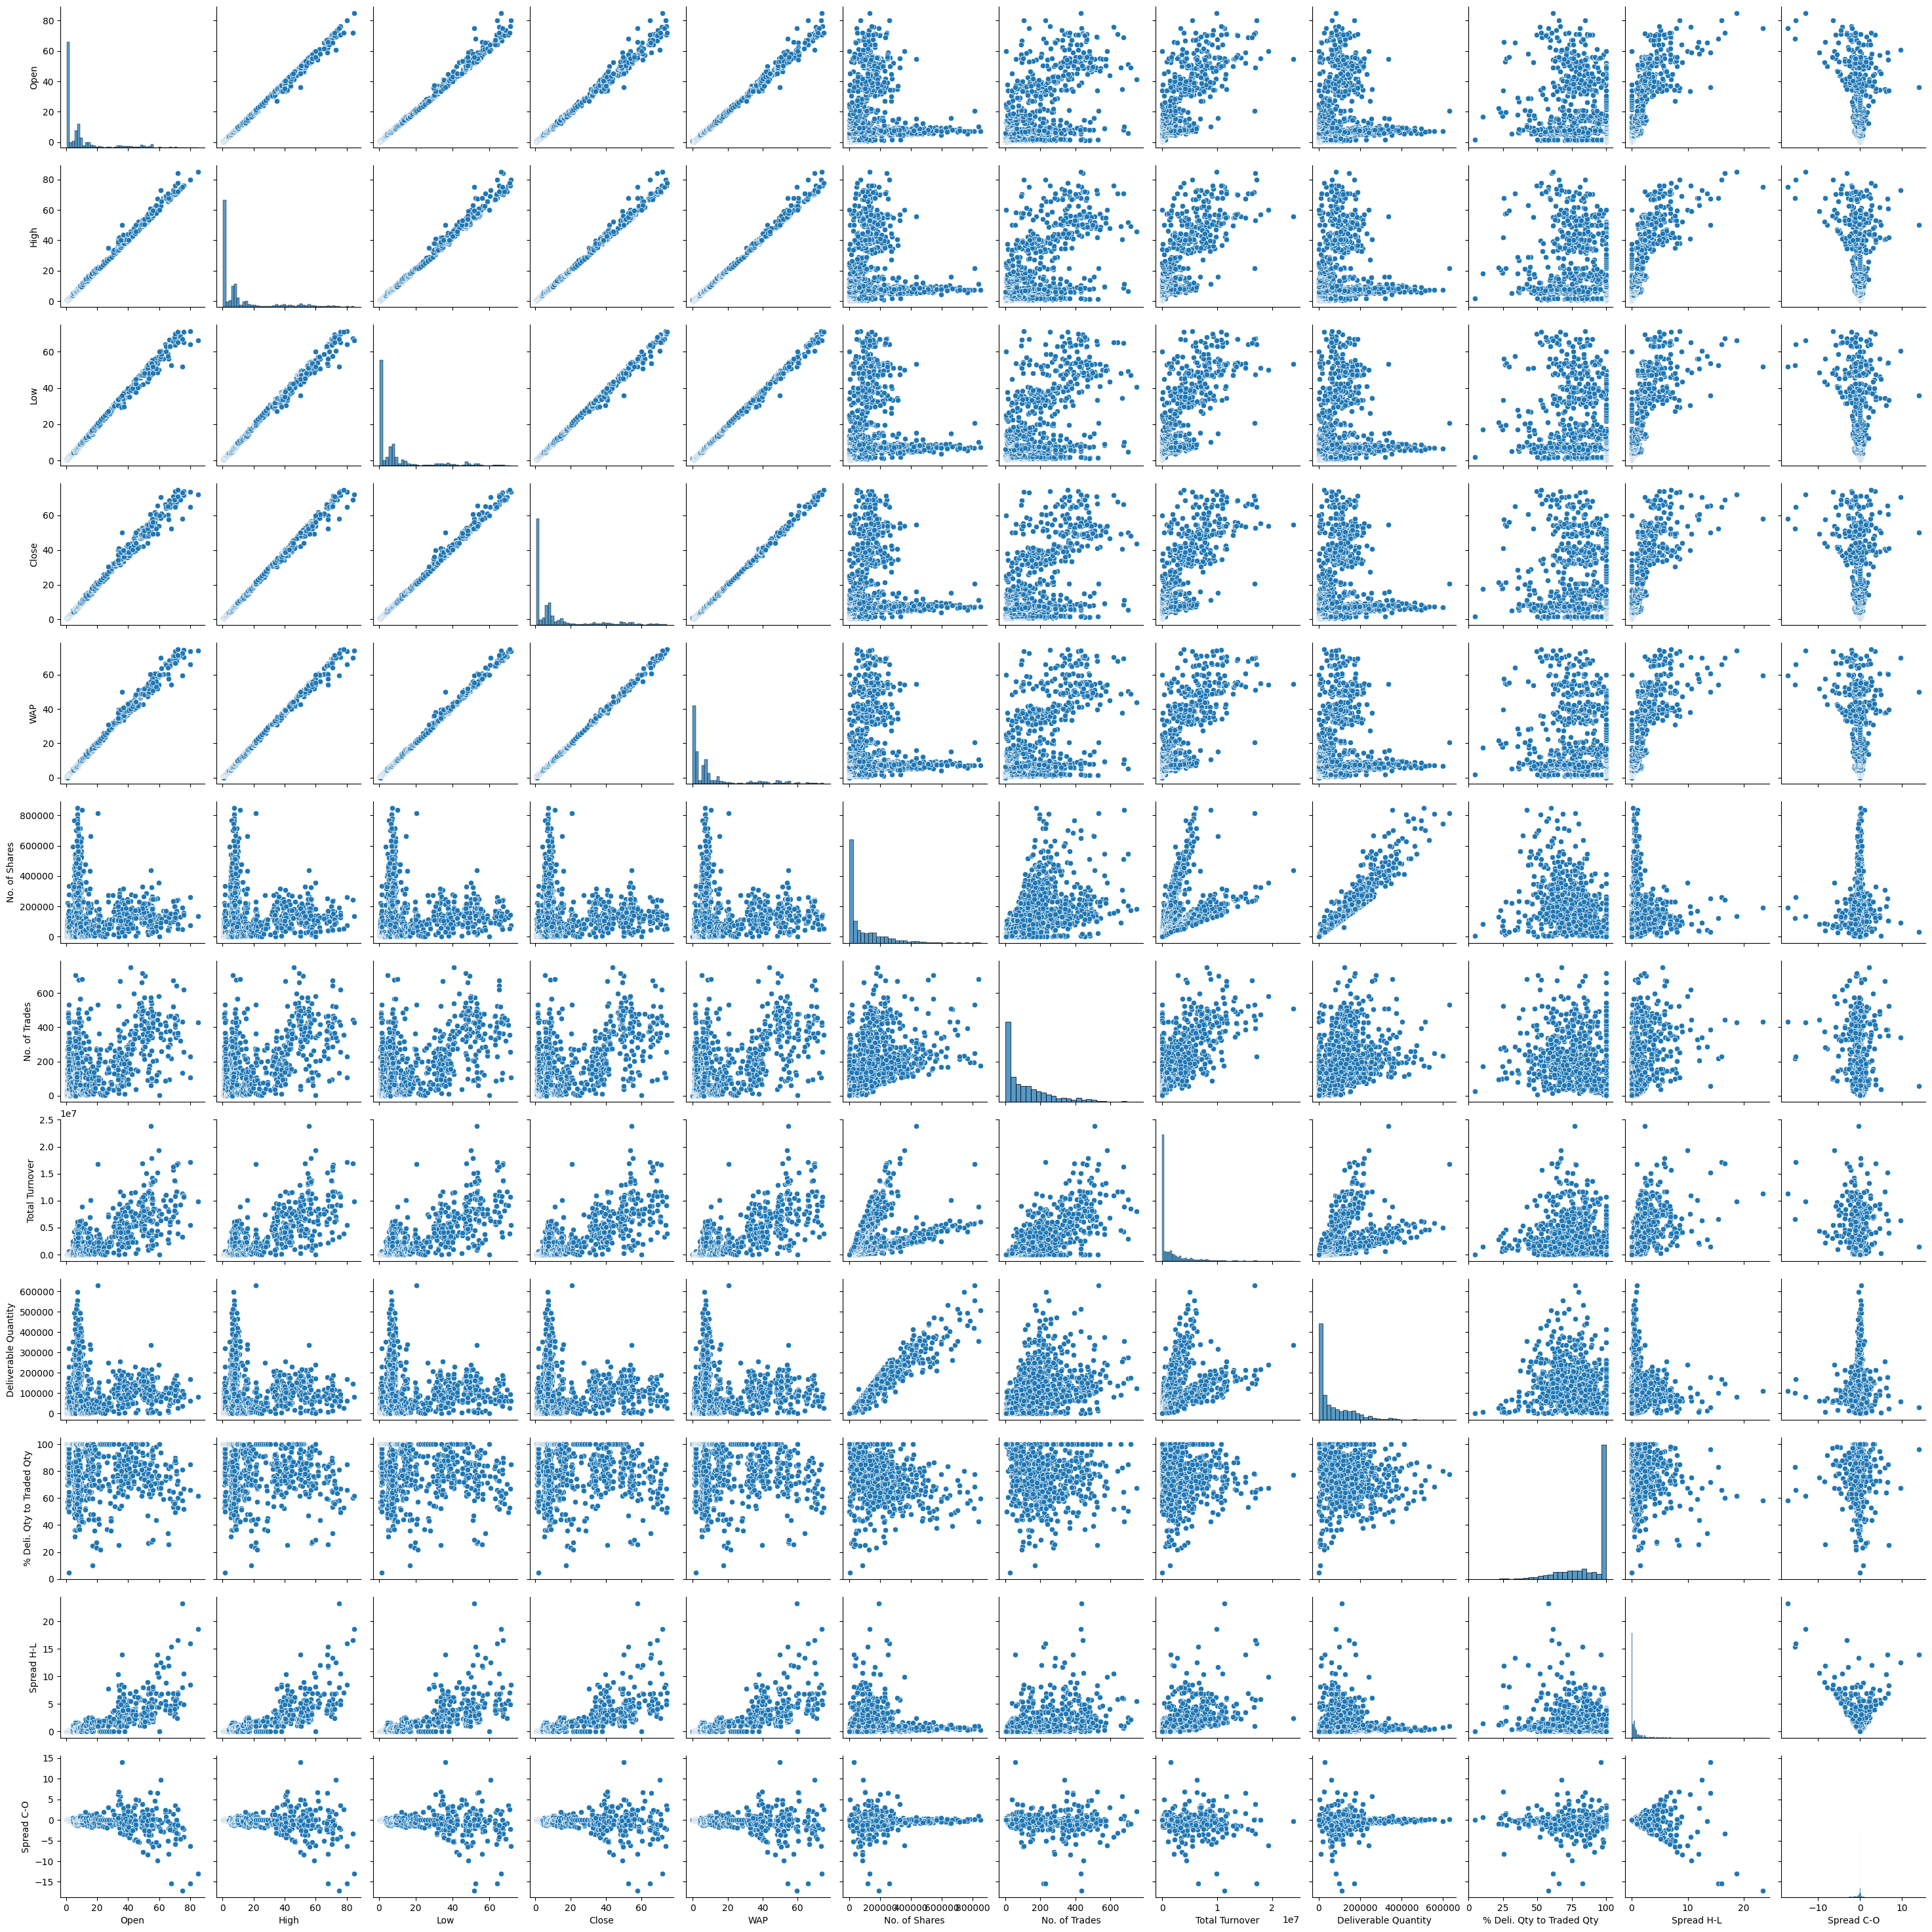

In [15]:
sns.pairplot(df)

## Feature Engineering

In [ ]:
df.drop(['Date'],axis=1,inplace=True)

## spliting data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x=df.drop(['Total Turnover'],axis=1)
y=df['Total Turnover']

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42)

**Decision Tree**

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [12]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train , y_train)
pred = dtree.predict(x_test)
print(r2_score(pred , y_test))

0.9827560100660231


**Linear Regression**

In [18]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(x_train , y_train)
pred = lr.predict(x_test)
print(r2_score(pred , y_test))

0.7728205818159006


**XGBoost Regressor**

In [ ]:
import xgboost

In [28]:
xg =xgboost.XGBRegressor()
xg.fit(x_train,y_train)
pred = xg.predict(x_test)
print(r2_score(pred,y_test))

0.9894408226724678


## Xgboost hyper parameter tuning using GridSearchCV

https://xgboost.readthedocs.io/en/stable/parameter.html

In [ ]:
Parameters
----------

    n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
        
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
        
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
        
    grow_policy : https://bangdasun.github.io/2019/03/21/38-practical-comparison-xgboost-lightgbm/
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
            
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
                                
    verbosity : Optional[int]
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
                                
    objective : https://machinelearningmastery.com/xgboost-loss-functions/
        typing.Union[str, typing.Callable[[numpy.ndarray, numpy.ndarray], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
                                
    booster: Optional[str]
        Specify which booster to use: gbtree, gblinear or dart.
                                
    tree_method: Optional[str]
        Specify which tree method to use.  Default to auto.  If this parameter is set to
        default, XGBoost will choose the most conservative option available.  It's
        recommended to study this option from the parameters document :doc:`tree method
        </treemethod>`
                                
    n_jobs : Optional[int]
        Number of parallel threads used to run xgboost.  When used with other
        Scikit-Learn algorithms like grid search, you may choose which algorithm to
        parallelize and balance the threads.  Creating thread contention will
        significantly slow down both algorithms.
                                
    gamma : Optional[float]
        (min_split_loss) Minimum loss reduction required to make a further partition on a
        leaf node of the tree.
                                
    min_child_weight : Optional[float] 
        https://stats.stackexchange.com/questions/317073/explanation-of-min-child-weight-in-xgboost-algorithm
        Minimum sum of instance weight(hessian) needed in a child.
                                
    max_delta_step : Optional[float]
        Maximum delta step we allow each tree's weight estimation to be.
                                
    subsample : Optional[float]
        Subsample ratio of the training instance.
                                
    sampling_method :
        Sampling method. Used only by `gpu_hist` tree method.
          - `uniform`: select random training instances uniformly.
          - `gradient_based` select random training instances with higher probability when
            the gradient and hessian are larger. (cf. CatBoost)
                                
    colsample_bytree : Optional[float]
        Subsample ratio of columns when constructing each tree.
                                
    colsample_bylevel : Optional[float]
        Subsample ratio of columns for each level.
                                
    colsample_bynode : Optional[float]
        Subsample ratio of columns for each split.
                                
    reg_alpha : Optional[float]
        L1 regularization term on weights (xgb's alpha).
                                           
    reg_lambda : Optional[float]
        L2 regularization term on weights (xgb's lambda).
                                           
    scale_pos_weight : Optional[float]
        Balancing of positive and negative weights.
                                           
    base_score : Optional[float]
        The initial prediction score of all instances, global bias.
                                           
    random_state : Optional[Union[numpy.random.RandomState, int]]
        Random number seed.

        .. note::

           Using gblinear booster with shotgun updater is nondeterministic as
           it uses Hogwild algorithm.

    missing : float, default np.nan
        Value in the data which needs to be present as a missing value.
                                           
    num_parallel_tree: Optional[int]
        Used for boosting random forest.
                                           
    monotone_constraints : Optional[Union[Dict[str, int], str]]
        Constraint of variable monotonicity.  See :doc:`tutorial </tutorials/monotonic>`
        for more information.
    interaction_constraints : Optional[Union[str, List[Tuple[str]]]]
        Constraints for interaction representing permitted interactions.  The
        constraints must be specified in the form of a nested list, e.g. ``[[0, 1], [2,
        3, 4]]``, where each inner list is a group of indices of features that are
        allowed to interact with each other.  See :doc:`tutorial
        </tutorials/feature_interaction_constraint>` for more information
    importance_type: Optional[str]
        The feature importance type for the feature_importances\_ property:

        * For tree model, it's either "gain", "weight", "cover", "total_gain" or
          "total_cover".
        * For linear model, only "weight" is defined and it's the normalized coefficients
          without bias.

    gpu_id : Optional[int]
        Device ordinal.
                                           
    validate_parameters : Optional[bool]
        Give warnings for unknown parameter.
                                           
    predictor : Optional[str]
        Force XGBoost to use specific predictor, available choices are [cpu_predictor,
        gpu_predictor].
                                           
    enable_categorical : bool

        .. versionadded:: 1.5.0

        .. note:: This parameter is experimental

        Experimental support for categorical data.  When enabled, cudf/pandas.DataFrame
        should be used to specify categorical data type.  Also, JSON/UBJSON
        serialization format is required.

    feature_types : FeatureTypes

        .. versionadded:: 1.7.0

        Used for specifying feature types without constructing a dataframe. See
        :py:class:`DMatrix` for details.

    max_cat_to_onehot : Optional[int]

        .. versionadded:: 1.6.0

        .. note:: This parameter is experimental

        A threshold for deciding whether XGBoost should use one-hot encoding based split
        for categorical data.  When number of categories is lesser than the threshold
        then one-hot encoding is chosen, otherwise the categories will be partitioned
        into children nodes. Also, `enable_categorical` needs to be set to have
        categorical feature support. See :doc:`Categorical Data
        </tutorials/categorical>` and :ref:`cat-param` for details.

    max_cat_threshold : Optional[int]

        .. versionadded:: 1.7.0

        .. note:: This parameter is experimental

        Maximum number of categories considered for each split. Used only by
        partition-based splits for preventing over-fitting. Also, `enable_categorical`
        needs to be set to have categorical feature support. See :doc:`Categorical Data
        </tutorials/categorical>` and :ref:`cat-param` for details.

    eval_metric : Optional[Union[str, List[str], Callable]]

        .. versionadded:: 1.6.0

        Metric used for monitoring the training result and early stopping.  It can be a
        string or list of strings as names of predefined metric in XGBoost (See
        doc/parameter.rst), one of the metrics in :py:mod:`sklearn.metrics`, or any other
        user defined metric that looks like `sklearn.metrics`.

        If custom objective is also provided, then custom metric should implement the
        corresponding reverse link function.

        Unlike the `scoring` parameter commonly used in scikit-learn, when a callable
        object is provided, it's assumed to be a cost function and by default XGBoost will
        minimize the result during early stopping.

        For advanced usage on Early stopping like directly choosing to maximize instead of
        minimize, see :py:obj:`xgboost.callback.EarlyStopping`.

        See :doc:`Custom Objective and Evaluation Metric </tutorials/custom_metric_obj>`
        for more.

        .. note::

             This parameter replaces `eval_metric` in :py:meth:`fit` method.  The old one
             receives un-transformed prediction regardless of whether custom objective is
             being used.

        .. code-block:: python

            from sklearn.datasets import load_diabetes
            from sklearn.metrics import mean_absolute_error
            X, y = load_diabetes(return_X_y=True)
            reg = xgb.XGBRegressor(
                tree_method="hist",
                eval_metric=mean_absolute_error,
            )
            reg.fit(X, y, eval_set=[(X, y)])

    early_stopping_rounds : Optional[int]

        .. versionadded:: 1.6.0

        Activates early stopping. Validation metric needs to improve at least once in
        every **early_stopping_rounds** round(s) to continue training.  Requires at least
        one item in **eval_set** in :py:meth:`fit`.

        The method returns the model from the last iteration (not the best one).  If
        there's more than one item in **eval_set**, the last entry will be used for early
        stopping.  If there's more than one metric in **eval_metric**, the last metric
        will be used for early stopping.

        If early stopping occurs, the model will have three additional fields:
        :py:attr:`best_score`, :py:attr:`best_iteration` and
        :py:attr:`best_ntree_limit`.

        .. note::

            This parameter replaces `early_stopping_rounds` in :py:meth:`fit` method.

    callbacks : Optional[List[TrainingCallback]]
        List of callback functions that are applied at end of each iteration.
        It is possible to use predefined callbacks by using
        :ref:`Callback API <callback_api>`.

        .. note::

           States in callback are not preserved during training, which means callback
           objects can not be reused for multiple training sessions without
           reinitialization or deepcopy.

        .. code-block:: python

            for params in parameters_grid:
                # be sure to (re)initialize the callbacks before each run
                callbacks = [xgb.callback.LearningRateScheduler(custom_rates)]
                xgboost.train(params, Xy, callbacks=callbacks)

    kwargs : dict, optional
        Keyword arguments for XGBoost Booster object.  Full documentation of parameters
        can be found :doc:`here </parameter>`.
        Attempting to set a parameter via the constructor args and \*\*kwargs
        dict simultaneously will result in a TypeError.

        .. note:: \*\*kwargs unsupported by scikit-learn

            \*\*kwargs is unsupported by scikit-learn.  We do not guarantee
            that parameters passed via this argument will interact properly
            with scikit-learn.

        .. note::  Custom objective function

            A custom objective function can be provided for the ``objective``
            parameter. In this case, it should have the signature
            ``objective(y_true, y_pred) -> grad, hess``:

            y_true: array_like of shape [n_samples]
                The target values
            y_pred: array_like of shape [n_samples]
                The predicted values

            grad: array_like of shape [n_samples]
                The value of the gradient for each sample point.
            hess: array_like of shape [n_samples]
                The value of the second derivative for each sample point

In [1]:
from sklearn.model_selection import GridSearchCV
import xgboost

In [38]:
params ={
    'eta':[0.01,0.1,1.0,0.2,0.25,0.5,0.3],
    'max_depth':[3,5,7,10,12,15,17,20],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.01,0.1,1.0,0.3,0.5]
}

In [39]:
xg =xgboost.XGBRegressor()
gs_xg = GridSearchCV(xg , param_grid = params , cv =5 , scoring ='r2',verbose=2)

In [40]:
gs_xg.fit(x_train , y_train)

Fitting 5 folds for each of 1120 candidates, totalling 5600 fits
[CV] END eta=0.01, gamma=0.01, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.01, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.01, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.01, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.01, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.01, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.01, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.01, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.01, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.01, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.01, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.01, gam

[CV] END eta=0.01, gamma=0.01, max_depth=12, min_child_weight=7; total time=   0.1s
[CV] END eta=0.01, gamma=0.01, max_depth=12, min_child_weight=7; total time=   0.1s
[CV] END eta=0.01, gamma=0.01, max_depth=15, min_child_weight=1; total time=   0.1s
[CV] END eta=0.01, gamma=0.01, max_depth=15, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.01, max_depth=15, min_child_weight=1; total time=   0.1s
[CV] END eta=0.01, gamma=0.01, max_depth=15, min_child_weight=1; total time=   0.1s
[CV] END eta=0.01, gamma=0.01, max_depth=15, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.01, max_depth=15, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.01, max_depth=15, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.01, max_depth=15, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.01, max_depth=15, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.01, max_depth=15, min_child_weight=3; total time=

[CV] END eta=0.01, gamma=0.1, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=0.0

[CV] END eta=0.01, gamma=0.1, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=20, min_child_weight=1; total time=   0.1s
[CV] END eta=0.01, gamma=0.1, max_depth=20, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=20, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=20, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=20, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=20, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=20, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.1, max_depth=20, min_child_weight=3; total time=   0.0s
[CV]

[CV] END eta=0.01, gamma=1.0, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.01, gamma=1.0, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.01, gamma=1.0, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.01, gamma=1.0, max_depth=12, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=1.0, max_depth=12, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=1.0, max_depth=12, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=1.0, max_depth=12, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=1.0, max_depth=12, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=1.0, max_depth=12, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=1.0, max_depth=12, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=1.0, max_depth=12, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=1.0, max_depth=12, min_child_weight=3; total time=   0.0s
[CV]

[CV] END eta=0.01, gamma=0.3, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=5, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=5, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=5, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=5, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=5, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.0

[CV] END eta=0.01, gamma=0.3, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=17, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=17, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=17, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=17, min_child_weight=1; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, max_depth=17, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=17, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=17, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=17, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=17, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=17, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, max_depth=17, min_child_weight=5; total time=   0.0s
[CV]

[CV] END eta=0.01, gamma=0.5, max_depth=10, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, max_depth=10, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, max_depth=10, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, max_depth=10, min_child_weight=1; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, max_depth=10, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, max_depth=10, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, max_depth=10, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, max_depth=10, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, max_depth=10, min_child_weight=3; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, max_depth=10, min_child_weight=5; total time=   0.0s
[CV]

[CV] END eta=0.1, gamma=0.01, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=0.1, gamma=0.01, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=0.1, gamma=0.01, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.1, gamma=0.01, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.1, gamma=0.01, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.1, gamma=0.01, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.1, gamma=0.01, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.1, gamma=0.01, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=0.01, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=0.01, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=0.01, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=0.01, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1

[CV] END eta=0.1, gamma=0.01, max_depth=15, min_child_weight=1; total time=   0.1s
[CV] END eta=0.1, gamma=0.01, max_depth=15, min_child_weight=1; total time=   0.2s
[CV] END eta=0.1, gamma=0.01, max_depth=15, min_child_weight=3; total time=   0.1s
[CV] END eta=0.1, gamma=0.01, max_depth=15, min_child_weight=3; total time=   0.1s
[CV] END eta=0.1, gamma=0.01, max_depth=15, min_child_weight=3; total time=   0.1s
[CV] END eta=0.1, gamma=0.01, max_depth=15, min_child_weight=3; total time=   0.1s
[CV] END eta=0.1, gamma=0.01, max_depth=15, min_child_weight=3; total time=   0.1s
[CV] END eta=0.1, gamma=0.01, max_depth=15, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=0.01, max_depth=15, min_child_weight=5; total time=   0.1s
[CV] END eta=0.1, gamma=0.01, max_depth=15, min_child_weight=5; total time=   0.1s
[CV] END eta=0.1, gamma=0.01, max_depth=15, min_child_weight=5; total time=   0.1s
[CV] END eta=0.1, gamma=0.01, max_depth=15, min_child_weight=5; total time=   0.1s
[CV]

[CV] END eta=0.1, gamma=0.1, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=0.1, gamma=0.1, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=0.1, gamma=0.1, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=0.1, gamma=0.1, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=0.1, gamma=0.1, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=0.1, gamma=0.1, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=0.1, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=0.1, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=0.1, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=0.1, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=0.1, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1, gamma=0.1, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1, gamma=0.1,

[CV] END eta=0.1, gamma=0.1, max_depth=20, min_child_weight=3; total time=   0.1s
[CV] END eta=0.1, gamma=0.1, max_depth=20, min_child_weight=3; total time=   0.1s
[CV] END eta=0.1, gamma=0.1, max_depth=20, min_child_weight=3; total time=   0.1s
[CV] END eta=0.1, gamma=0.1, max_depth=20, min_child_weight=3; total time=   0.1s
[CV] END eta=0.1, gamma=0.1, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=0.1, gamma=0.1, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=0.1, gamma=0.1, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=0.1, gamma=0.1, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=0.1, gamma=0.1, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=0.1, gamma=0.1, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=0.1, gamma=0.1, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=0.1, gamma=0.1, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=0.1

[CV] END eta=0.1, gamma=1.0, max_depth=12, min_child_weight=3; total time=   0.0s
[CV] END eta=0.1, gamma=1.0, max_depth=12, min_child_weight=3; total time=   0.1s
[CV] END eta=0.1, gamma=1.0, max_depth=12, min_child_weight=3; total time=   0.0s
[CV] END eta=0.1, gamma=1.0, max_depth=12, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=1.0, max_depth=12, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=1.0, max_depth=12, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=1.0, max_depth=12, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=1.0, max_depth=12, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=1.0, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1, gamma=1.0, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1, gamma=1.0, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1, gamma=1.0, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1

[CV] END eta=0.1, gamma=0.3, max_depth=5, min_child_weight=3; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=0.1, gamma=0.3,

[CV] END eta=0.1, gamma=0.3, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, max_depth=17, min_child_weight=7; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, max_depth=17, min_child_weight=7; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, max_depth=20, min_child_weight=1; total time=   0.2s
[CV] END eta=0.1, gamma=0.3, max_depth=20, min_child_weight=1; total time=   0.2s
[CV] END eta=0.1

[CV] END eta=0.1, gamma=0.5, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, max_depth=12, min_child_weight=1; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, max_depth=12, min_child_weight=1; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, max_depth=12, min_child_weight=1; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, max_depth=12, min_child_weight=1; total time=   0.1s
[CV] END eta=0.1

[CV] END eta=1.0, gamma=0.01, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0

[CV] END eta=1.0, gamma=0.01, max_depth=15, min_child_weight=5; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=15, min_child_weight=5; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=15, min_child_weight=5; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.01, max_depth=17, min_child_weight=1; total time=   0.1s
[CV] END eta=1.0, gamma=0.01, max_depth=17, min_child_weight=1; total time=   0.2s
[CV] END eta=1.0, gamma=0.01, max_depth=17, min_child_weight=1; total time=   0.1s
[CV] END eta=1.0, gamma=0.01, max_depth=17, min_child_weight=1; total time=   0.1s
[CV]

[CV] END eta=1.0, gamma=0.1, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=1.0, gamma=0.1, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=1.0, gamma=0.1, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.1, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.1, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.1, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.1, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.1, max_depth=10, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0, gamma=0.1, max_depth=10, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0, gamma=0.1, max_depth=10, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0, gamma=0.1, max_depth=10, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0, gamma=0.1, max_depth=10, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0, gamma

[CV] END eta=1.0, gamma=0.1, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=1.0, gamma=0.1, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=1.0, gamma=0.1, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=1.0, gamma=0.1, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=1.0, gamma=0.1, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=1.0, gamma=0.1, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=1.0, gamma=1.0, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0, gamma=1.0, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0, gamma=1.0, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0, gamma=1.0, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0, gamma=1.0, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0, gamma=1.0, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=1.0, gamm

[CV] END eta=1.0, gamma=1.0, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=1.0, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=1.0, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=1.0, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=1.0, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=1.0, max_depth=15, min_child_weight=1; total time=   0.1s
[CV] END eta=1.0, gamma=1.0, max_depth=15, min_child_weight=1; total time=   0.1s
[CV] END eta=1.0, gamma=1.0, max_depth=15, min_child_weight=1; total time=   0.1s
[CV] END eta=1.0, gamma=1.0, max_depth=15, min_child_weight=1; total time=   0.1s
[CV] END eta=1.0, gamma=1.0, max_depth=15, min_child_weight=1; total time=   0.1s
[CV] END eta=1.0, gamma=1.0, max_depth=15, min_child_weight=3; total time=   0.1s
[CV] END eta=1.0, gamma=1.0, max_depth=15, min_child_weight=3; total time=   0.1s
[CV] END eta=1.0

[CV] END eta=1.0, gamma=0.3, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.3, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.3, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.3, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0, gamma=0.3, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0, gamma=0.3, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0, gamma=0.3, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0, gamma=0.3, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=1.0, gamma=0.3, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=1.0, gamma=0.3, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=1.0, gamma=0.3, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=1.0, gamma=0.3, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=1.0, gamma=0.3,

[CV] END eta=1.0, gamma=0.3, max_depth=17, min_child_weight=7; total time=   0.1s
[CV] END eta=1.0, gamma=0.3, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=1.0, gamma=0.3, max_depth=20, min_child_weight=1; total time=   0.2s
[CV] END eta=1.0, gamma=0.3, max_depth=20, min_child_weight=1; total time=   0.2s
[CV] END eta=1.0, gamma=0.3, max_depth=20, min_child_weight=1; total time=   0.2s
[CV] END eta=1.0, gamma=0.3, max_depth=20, min_child_weight=1; total time=   0.2s
[CV] END eta=1.0, gamma=0.3, max_depth=20, min_child_weight=1; total time=   0.2s
[CV] END eta=1.0, gamma=0.3, max_depth=20, min_child_weight=3; total time=   0.1s
[CV] END eta=1.0, gamma=0.3, max_depth=20, min_child_weight=3; total time=   0.1s
[CV] END eta=1.0, gamma=0.3, max_depth=20, min_child_weight=3; total time=   0.1s
[CV] END eta=1.0, gamma=0.3, max_depth=20, min_child_weight=3; total time=   0.1s
[CV] END eta=1.0, gamma=0.3, max_depth=20, min_child_weight=3; total time=   0.1s
[CV] END eta=1.0

[CV] END eta=1.0, gamma=0.5, max_depth=12, min_child_weight=1; total time=   0.1s
[CV] END eta=1.0, gamma=0.5, max_depth=12, min_child_weight=1; total time=   0.1s
[CV] END eta=1.0, gamma=0.5, max_depth=12, min_child_weight=1; total time=   0.1s
[CV] END eta=1.0, gamma=0.5, max_depth=12, min_child_weight=1; total time=   0.1s
[CV] END eta=1.0, gamma=0.5, max_depth=12, min_child_weight=1; total time=   0.1s
[CV] END eta=1.0, gamma=0.5, max_depth=12, min_child_weight=3; total time=   0.0s
[CV] END eta=1.0, gamma=0.5, max_depth=12, min_child_weight=3; total time=   0.0s
[CV] END eta=1.0, gamma=0.5, max_depth=12, min_child_weight=3; total time=   0.1s
[CV] END eta=1.0, gamma=0.5, max_depth=12, min_child_weight=3; total time=   0.0s
[CV] END eta=1.0, gamma=0.5, max_depth=12, min_child_weight=3; total time=   0.0s
[CV] END eta=1.0, gamma=0.5, max_depth=12, min_child_weight=5; total time=   0.0s
[CV] END eta=1.0, gamma=0.5, max_depth=12, min_child_weight=5; total time=   0.0s
[CV] END eta=1.0

[CV] END eta=0.2, gamma=0.01, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.2, gamma=0.01, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.2, gamma=0.01, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.2, gamma=0.01, max_depth=5, min_child_weight=3; total time=   0.0s
[CV] END eta=0.2, gamma=0.01, max_depth=5, min_child_weight=3; total time=   0.0s
[CV] END eta=0.2, gamma=0.01, max_depth=5, min_child_weight=3; total time=   0.0s
[CV] END eta=0.2, gamma=0.01, max_depth=5, min_child_weight=3; total time=   0.0s
[CV] END eta=0.2, gamma=0.01, max_depth=5, min_child_weight=3; total time=   0.0s
[CV] END eta=0.2, gamma=0.01, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=0.01, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=0.01, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=0.01, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2

[CV] END eta=0.2, gamma=0.01, max_depth=17, min_child_weight=1; total time=   0.2s
[CV] END eta=0.2, gamma=0.01, max_depth=17, min_child_weight=1; total time=   0.2s
[CV] END eta=0.2, gamma=0.01, max_depth=17, min_child_weight=1; total time=   0.2s
[CV] END eta=0.2, gamma=0.01, max_depth=17, min_child_weight=3; total time=   0.1s
[CV] END eta=0.2, gamma=0.01, max_depth=17, min_child_weight=3; total time=   0.1s
[CV] END eta=0.2, gamma=0.01, max_depth=17, min_child_weight=3; total time=   0.1s
[CV] END eta=0.2, gamma=0.01, max_depth=17, min_child_weight=3; total time=   0.1s
[CV] END eta=0.2, gamma=0.01, max_depth=17, min_child_weight=3; total time=   0.1s
[CV] END eta=0.2, gamma=0.01, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.2, gamma=0.01, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.2, gamma=0.01, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.2, gamma=0.01, max_depth=17, min_child_weight=5; total time=   0.1s
[CV]

[CV] END eta=0.2, gamma=0.1, max_depth=10, min_child_weight=1; total time=   0.0s
[CV] END eta=0.2, gamma=0.1, max_depth=10, min_child_weight=1; total time=   0.0s
[CV] END eta=0.2, gamma=0.1, max_depth=10, min_child_weight=3; total time=   0.0s
[CV] END eta=0.2, gamma=0.1, max_depth=10, min_child_weight=3; total time=   0.0s
[CV] END eta=0.2, gamma=0.1, max_depth=10, min_child_weight=3; total time=   0.0s
[CV] END eta=0.2, gamma=0.1, max_depth=10, min_child_weight=3; total time=   0.0s
[CV] END eta=0.2, gamma=0.1, max_depth=10, min_child_weight=3; total time=   0.0s
[CV] END eta=0.2, gamma=0.1, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=0.1, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=0.1, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=0.1, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=0.1, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2

[CV] END eta=0.2, gamma=1.0, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=0.2, gamma=1.0, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.2, gamma=1.0, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.2, gamma=1.0, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.2, gamma=1.0, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.2, gamma=1.0, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.2, gamma=1.0, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=1.0, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=1.0, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=1.0, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=1.0, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=1.0, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END eta=0.2, gamma=1.0,

[CV] END eta=0.2, gamma=1.0, max_depth=15, min_child_weight=3; total time=   0.1s
[CV] END eta=0.2, gamma=1.0, max_depth=15, min_child_weight=3; total time=   0.1s
[CV] END eta=0.2, gamma=1.0, max_depth=15, min_child_weight=3; total time=   0.1s
[CV] END eta=0.2, gamma=1.0, max_depth=15, min_child_weight=3; total time=   0.1s
[CV] END eta=0.2, gamma=1.0, max_depth=15, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=1.0, max_depth=15, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=1.0, max_depth=15, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=1.0, max_depth=15, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=1.0, max_depth=15, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=1.0, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=0.2, gamma=1.0, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=0.2, gamma=1.0, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=0.2

[CV] END eta=0.2, gamma=0.3, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=0.2, gamma=0.3,

[CV] END eta=0.2, gamma=0.3, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=0.2, 

[CV] END eta=0.2, gamma=0.5, max_depth=12, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, max_depth=12, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, max_depth=12, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, max_depth=12, min_child_weight=5; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, max_depth=15, min_child_weight=1; total time=   0.2s
[CV] END eta=0.2, gamma=0.5, max_depth=15, min_child_weight=1; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, max_depth=15, min_child_weight=1; total time=   0.1s
[CV] END eta=0.2

[CV] END eta=0.25, gamma=0.01, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=0.01, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=0.01, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=0.01, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.01, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.01, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.01, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.01, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.01, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=0.25, gamma=0.01, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=0.25, gamma=0.01, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=0.25, gamma=0.01, max_depth=7, min_child_weight=1; total time=   0.0s
[CV]

[CV] END eta=0.25, gamma=0.01, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.25, gamma=0.01, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.25, gamma=0.01, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.25, gamma=0.01, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.25, gamma=0.01, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.25, gamma=0.01, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.01, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.01, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.01, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.01, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.01, max_depth=20, min_child_weight=1; total time=   0.2s
[CV] END eta=0.25, gamma=0.01, max_depth=20, min_child_weight=1; total time=

[CV] END eta=0.25, gamma=0.1, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=0.1, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=0.1, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=0.1, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=0.1, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=0.1, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.1, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.1, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.1, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.1, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.1, max_depth=12, min_child_weight=1; total time=   0.1s
[CV] END eta=0.25, gamma=0.1, max_depth=12, min_child_weight=1; total time=   0.1s
[CV]

[CV] END eta=0.25, gamma=1.0, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=1.0, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=1.0, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=1.0, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=1.0, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=1.0, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=1.0, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=1.0, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=1.0, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.25, gamma=1.0, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.25, gamma=1.0, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.25, gamma=1.0, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.2

[CV] END eta=0.25, gamma=1.0, max_depth=15, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=1.0, max_depth=15, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=1.0, max_depth=15, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=1.0, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=1.0, max_depth=15, min_child_weight=7; total time=   0.1s
[CV] END eta=0.25, gamma=1.0, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=1.0, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=1.0, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=1.0, max_depth=17, min_child_weight=1; total time=   0.1s
[CV] END eta=0.25, gamma=1.0, max_depth=17, min_child_weight=1; total time=   0.2s
[CV] END eta=0.25, gamma=1.0, max_depth=17, min_child_weight=1; total time=   0.2s
[CV] END eta=0.25, gamma=1.0, max_depth=17, min_child_weight=1; total time=   0.2s
[CV]

[CV] END eta=0.25, gamma=0.3, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=0.3, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=0.3, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=0.3, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.3, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.3, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.3, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.3, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.3, max_depth=10, min_child_weight=1; total time=   0.0s
[CV] END eta=0.25, gamma=0.3, max_depth=10, min_child_weight=1; total time=   0.0s
[CV] END eta=0.25, gamma=0.3, max_depth=10, min_child_weight=1; total time=   0.0s
[CV] END eta=0.25, gamma=0.3, max_depth=10, min_child_weight=1; total time=   0.0s
[CV] END eta

[CV] END eta=0.25, gamma=0.3, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=0.25, gamma=0.3, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=0.25, gamma=0.3, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=0.25, gamma=0.3, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=0.25, gamma=0.3, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=0.25, gamma=0.3, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=0.25, gamma=0.3, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=0.25, gamma=0.3, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=0.25, gamma=0.5, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=0.25, gamma=0.5, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=0.25, gamma=0.5, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=0.25, gamma=0.5, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END

[CV] END eta=0.25, gamma=0.5, max_depth=12, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=0.5, max_depth=12, min_child_weight=5; total time=   0.0s
[CV] END eta=0.25, gamma=0.5, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.5, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.5, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.5, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.5, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=0.25, gamma=0.5, max_depth=15, min_child_weight=1; total time=   0.1s
[CV] END eta=0.25, gamma=0.5, max_depth=15, min_child_weight=1; total time=   0.1s
[CV] END eta=0.25, gamma=0.5, max_depth=15, min_child_weight=1; total time=   0.1s
[CV] END eta=0.25, gamma=0.5, max_depth=15, min_child_weight=1; total time=   0.1s
[CV] END eta=0.25, gamma=0.5, max_depth=15, min_child_weight=1; total time=   0.1s
[CV]

[CV] END eta=0.5, gamma=0.01, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.5, gamma=0.01, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.5, gamma=0.01, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.5, gamma=0.01, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.5, gamma=0.01, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.5, gamma=0.01, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=0.5, gamma=0.01, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=0.5, gamma=0.01, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=0.5, gamma=0.01, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=0.5, gamma=0.01, max_depth=7, min_child_weight=1; total time=   0.0s
[CV] END eta=0.5, gamma=0.01, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5, gamma=0.01, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5

[CV] END eta=0.5, gamma=0.01, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.5, gamma=0.01, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.5, gamma=0.01, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.5, gamma=0.01, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.5, gamma=0.01, max_depth=20, min_child_weight=1; total time=   0.2s
[CV] END eta=0.5, gamma=0.01, max_depth=20, min_child_weight=1; total time=   0.2s
[CV] END eta=0.5, gamma=0.01, max_depth=20, min_child_weight=1; total time=   0.2s
[CV] END eta=0.5, gamma=0.01, max_depth=20, min_child_weight=1; total time=   0.2s
[CV] END eta=0.5, gamma=0.01, max_depth=20, min_child_weight=1; total time=   0.2s
[CV] END eta=0.5, gamma=0.01, max_depth=20, min_child_weight=3; total time=   0.1s
[CV] END eta=0.5, gamma=0.01, max_depth=20, min_child_weight=3; total time=   0.1s
[CV] END eta=0.5, gamma=0.01, max_depth=20, min_child_weight=3; total time=   0.1s
[CV]

[CV] END eta=0.5, gamma=0.1, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.5, gamma=0.1, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.5, gamma=0.1, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.5, gamma=0.1, max_depth=12, min_child_weight=1; total time=   0.1s
[CV] END eta=0.5, gamma=0.1, max_depth=12, min_child_weight=1; total time=   0.1s
[CV] END eta=0.5, gamma=0.1, max_depth=12, min_child_weight=1; total time=   0.1s
[CV] END eta=0.5, gamma=0.1, max_depth=12, min_child_weight=1; total time=   0.1s
[CV] END eta=0.5, gamma=0.1, max_depth=12, min_child_weight=1; total time=   0.1s
[CV] END eta=0.5, gamma=0.1, max_depth=12, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5, gamma=0.1, max_depth=12, min_child_weight=3; total time=   0.1s
[CV] END eta=0.5, gamma=0.1, max_depth=12, min_child_weight=3; total time=   0.1s
[CV] END eta=0.5, gamma=0.1, max_depth=12, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5

[CV] END eta=0.5, gamma=1.0, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.5, gamma=1.0, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.5, gamma=1.0, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.5, gamma=1.0, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.5, gamma=1.0, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.5, gamma=1.0, max_depth=5, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5, gamma=1.0, max_depth=5, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5, gamma=1.0, max_depth=5, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5, gamma=1.0, max_depth=5, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5, gamma=1.0, max_depth=5, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5, gamma=1.0, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.5, gamma=1.0, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.5, gamma=1.0,

[CV] END eta=0.5, gamma=1.0, max_depth=17, min_child_weight=1; total time=   0.1s
[CV] END eta=0.5, gamma=1.0, max_depth=17, min_child_weight=1; total time=   0.1s
[CV] END eta=0.5, gamma=1.0, max_depth=17, min_child_weight=1; total time=   0.2s
[CV] END eta=0.5, gamma=1.0, max_depth=17, min_child_weight=1; total time=   0.1s
[CV] END eta=0.5, gamma=1.0, max_depth=17, min_child_weight=3; total time=   0.1s
[CV] END eta=0.5, gamma=1.0, max_depth=17, min_child_weight=3; total time=   0.1s
[CV] END eta=0.5, gamma=1.0, max_depth=17, min_child_weight=3; total time=   0.1s
[CV] END eta=0.5, gamma=1.0, max_depth=17, min_child_weight=3; total time=   0.1s
[CV] END eta=0.5, gamma=1.0, max_depth=17, min_child_weight=3; total time=   0.1s
[CV] END eta=0.5, gamma=1.0, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.5, gamma=1.0, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.5, gamma=1.0, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.5

[CV] END eta=0.5, gamma=0.3, max_depth=10, min_child_weight=1; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, max_depth=10, min_child_weight=1; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, max_depth=10, min_child_weight=1; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, max_depth=10, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, max_depth=10, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, max_depth=10, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, max_depth=10, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, max_depth=10, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.5

[CV] END eta=0.5, gamma=0.5, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, max_depth=3, min_child_weight=1; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.5, gamma=0.5,

[CV] END eta=0.5, gamma=0.5, max_depth=15, min_child_weight=1; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, max_depth=15, min_child_weight=3; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, max_depth=15, min_child_weight=3; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, max_depth=15, min_child_weight=3; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, max_depth=15, min_child_weight=3; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, max_depth=15, min_child_weight=3; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, max_depth=15, min_child_weight=5; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, max_depth=15, min_child_weight=5; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, max_depth=15, min_child_weight=5; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, max_depth=15, min_child_weight=5; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, max_depth=15, min_child_weight=5; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=0.5

[CV] END eta=0.3, gamma=0.01, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=0.3, gamma=0.01, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=0.3, gamma=0.01, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=0.3, gamma=0.01, max_depth=7, min_child_weight=3; total time=   0.0s
[CV] END eta=0.3, gamma=0.01, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=0.01, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=0.01, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=0.01, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=0.01, max_depth=7, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=0.01, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.01, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.01, max_depth=7, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3

[CV] END eta=0.3, gamma=0.01, max_depth=20, min_child_weight=3; total time=   0.1s
[CV] END eta=0.3, gamma=0.01, max_depth=20, min_child_weight=3; total time=   0.1s
[CV] END eta=0.3, gamma=0.01, max_depth=20, min_child_weight=3; total time=   0.1s
[CV] END eta=0.3, gamma=0.01, max_depth=20, min_child_weight=3; total time=   0.1s
[CV] END eta=0.3, gamma=0.01, max_depth=20, min_child_weight=3; total time=   0.1s
[CV] END eta=0.3, gamma=0.01, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=0.3, gamma=0.01, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=0.3, gamma=0.01, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=0.3, gamma=0.01, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=0.3, gamma=0.01, max_depth=20, min_child_weight=5; total time=   0.1s
[CV] END eta=0.3, gamma=0.01, max_depth=20, min_child_weight=7; total time=   0.1s
[CV] END eta=0.3, gamma=0.01, max_depth=20, min_child_weight=7; total time=   0.1s
[CV]

[CV] END eta=0.3, gamma=0.1, max_depth=12, min_child_weight=3; total time=   0.0s
[CV] END eta=0.3, gamma=0.1, max_depth=12, min_child_weight=3; total time=   0.0s
[CV] END eta=0.3, gamma=0.1, max_depth=12, min_child_weight=3; total time=   0.0s
[CV] END eta=0.3, gamma=0.1, max_depth=12, min_child_weight=3; total time=   0.0s
[CV] END eta=0.3, gamma=0.1, max_depth=12, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=0.1, max_depth=12, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=0.1, max_depth=12, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=0.1, max_depth=12, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=0.1, max_depth=12, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=0.1, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.1, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.1, max_depth=12, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3

[CV] END eta=0.3, gamma=1.0, max_depth=5, min_child_weight=3; total time=   0.0s
[CV] END eta=0.3, gamma=1.0, max_depth=5, min_child_weight=3; total time=   0.0s
[CV] END eta=0.3, gamma=1.0, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=1.0, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=1.0, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=1.0, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=1.0, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=1.0, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=1.0, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=1.0, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=1.0, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=1.0, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=1.0,

[CV] END eta=0.3, gamma=1.0, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.3, gamma=1.0, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.3, gamma=1.0, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.3, gamma=1.0, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.3, gamma=1.0, max_depth=17, min_child_weight=5; total time=   0.1s
[CV] END eta=0.3, gamma=1.0, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=1.0, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=1.0, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=1.0, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=1.0, max_depth=17, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=1.0, max_depth=20, min_child_weight=1; total time=   0.2s
[CV] END eta=0.3, gamma=1.0, max_depth=20, min_child_weight=1; total time=   0.2s
[CV] END eta=0.3

[CV] END eta=0.3, gamma=0.3, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, max_depth=10, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, max_depth=10, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, max_depth=12, min_child_weight=1; total time=   0.1s
[CV] END eta=0.3, gamma=0.3, max_depth=12, min_child_weight=1; total time=   0.1s
[CV] END eta=0.3, gamma=0.3, max_depth=12, min_child_weight=1; total time=   0.1s
[CV] END eta=0.3

[CV] END eta=0.3, gamma=0.5, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, max_depth=5, min_child_weight=1; total time=   0.0s
[CV] END eta=0.3, gamma=0.5,

[CV] END eta=0.3, gamma=0.5, max_depth=15, min_child_weight=5; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, max_depth=15, min_child_weight=7; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, max_depth=17, min_child_weight=1; total time=   0.2s
[CV] END eta=0.3, gamma=0.5, max_depth=17, min_child_weight=1; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, max_depth=17, min_child_weight=1; total time=   0.2s
[CV] END eta=0.3, gamma=0.5, max_depth=17, min_child_weight=1; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, max_depth=17, min_child_weight=1; total time=   0.2s
[CV] END eta=0.3, gamma=0.5, max_depth=17, min_child_weight=3; total time=   0.1s
[CV] END eta=0.3

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [41]:
print(gs_xg.best_score_)

0.980380862631472


In [42]:
print(gs_xg.best_params_)

{'eta': 0.2, 'gamma': 0.01, 'max_depth': 3, 'min_child_weight': 1}
